In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as lite
import sys
from pyne import nucname
import pandas as pd
import pickle
from pyne.material import Material
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import svm
import pickle

In [5]:
# get sqlite cursor
df = pd.read_csv('./curated.csv', index_col=0)
df = df.loc[df['reactor_type'] == 'PWR']

# only get assemblies with enrichment bigger than 1.5 and bunrup higher than 10,000
df = df.loc[(df['init_enr'] > 1.5) & (df['bu'] > 10000)]
len(df.index)

104551

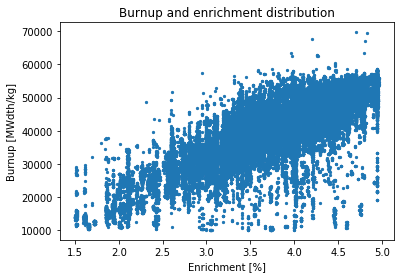

In [6]:
# visualize 
plt.scatter(df['init_enr'], df['bu'], s=5)
plt.xlabel('Enrichment [%]')
plt.ylabel('Burnup [MWdth/kg]')
plt.title('Burnup and enrichment distribution')
plt.savefig('./images/enr_bu.png', format='png')
plt.show()

# Finding the Average Assembly and its Composition 

In [7]:
avg_burnup = df['bu'].median()
avg_enrichment = df['init_enr'].median()

print('AVG BURNUP: %f MWD/MTHM \nAVG ENRICHMENT: %f wt%% U235' %(avg_burnup, avg_enrichment))

AVG BURNUP: 41553.000000 MWD/MTHM 
AVG ENRICHMENT: 3.850000 wt% U235


In [8]:
# average assembly composition
df['err'] = abs(df['bu'] - avg_burnup) + abs(df['init_enr'] - avg_enrichment) * 10000
minimum_err = df['err'].argmin()
df = df.drop(columns='err')
average_assem = df.loc[minimum_err]
print(average_assem)

reactor_type               PWR
total_mass             456.047
evaluation_date     2000-04-22
init_enr                  3.85
bu                       41552
zr-95              0.000122763
zr-93                0.0962289
ra-226             5.88697e-12
ru-103             7.00586e-06
ru-106              0.00934187
sb-124             9.56244e-08
sb-125              0.00108048
pu-238               0.0300441
pu-239                0.775676
np-237               0.0652487
nb-95              0.000144818
pa-231             6.65581e-08
pd-107               0.0296003
pm-147               0.0151876
pu-240                0.275281
pu-241                0.187644
pu-244             5.52363e-06
pu-242               0.0657992
i-129                0.0201305
h-3                6.53366e-06
kr-85               0.00331727
nb-94              1.87569e-07
cm-248             6.64511e-08
cs-134               0.0128024
cs-135               0.0624142
                      ...     
eu-154              0.00365653
eu-155  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# get isotope dictionary
avg_recipe = average_assem.iloc[5:].to_dict()
# change other to h-1
avg_recipe['h-1'] = avg_recipe.pop('other')
avg_recipe

{'zr-95': 0.0001227633204472346,
 'zr-93': 0.096228941315259178,
 'ra-226': 5.8869732724916509e-12,
 'ru-103': 7.0058605801595029e-06,
 'ru-106': 0.0093418695880029927,
 'sb-124': 9.5624424675526867e-08,
 'sb-125': 0.0010804804767929623,
 'pu-238': 0.030044146765574608,
 'pu-239': 0.77567643247296891,
 'np-237': 0.065248691472589479,
 'nb-95': 0.00014481810427434017,
 'pa-231': 6.6558093792964332e-08,
 'pd-107': 0.029600297776325689,
 'pm-147': 0.01518759755025249,
 'pu-240': 0.27528077149942881,
 'pu-241': 0.18764442919260521,
 'pu-244': 5.5236341868272345e-06,
 'pu-242': 0.065799242183371465,
 'i-129': 0.020130486112177041,
 'h-3': 6.5336612235142441e-06,
 'kr-85': 0.0033172683955820345,
 'nb-94': 1.8756899398526907e-07,
 'cm-248': 6.6451135518926772e-08,
 'cs-134': 0.012802351073463921,
 'cs-135': 0.062414248969952665,
 'cm-245': 0.00061684032566818774,
 'cm-244': 0.0075383798161154456,
 'cm-246': 5.2861393672143442e-05,
 'cm-247': 8.6589156380811637e-07,
 'eu-152': 2.22229857887454

# We store all the assemblies in a dictionary, one with the composition with UNF-ST&DARDS, and the other with recipe composition

In [10]:
iso_list = list(df)[5:]
iso_list

['zr-95',
 'zr-93',
 'ra-226',
 'ru-103',
 'ru-106',
 'sb-124',
 'sb-125',
 'pu-238',
 'pu-239',
 'np-237',
 'nb-95',
 'pa-231',
 'pd-107',
 'pm-147',
 'pu-240',
 'pu-241',
 'pu-244',
 'pu-242',
 'i-129',
 'h-3',
 'kr-85',
 'nb-94',
 'cm-248',
 'cs-134',
 'cs-135',
 'cm-245',
 'cm-244',
 'cm-246',
 'cm-247',
 'eu-152',
 'cs-137',
 'eu-154',
 'eu-155',
 'am-241',
 'am-242m',
 'am-243',
 'cf-251',
 'cf-249',
 'ag-108m',
 'ag-110m',
 'ac-227',
 'cm-243',
 'cm-242',
 'c-14',
 'ce-144',
 'u-234',
 'u-235',
 'u-236',
 'y-90',
 'u-238',
 'th-229',
 'tc-99',
 'sm-151',
 'se-79',
 'sr-90',
 'sn-126',
 'th-232',
 'th-230',
 'u-232',
 'u-233',
 'other']

In [11]:
model_dict = pickle.load(open('./script/ann_model.pkl', 'rb'))
model_dict

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


{'model': <keras.engine.sequential.Sequential at 0x107eb8518>,
 'xscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'yscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'iso_list': ['zr-95',
  'zr-93',
  'ra-226',
  'ru-103',
  'ru-106',
  'sb-124',
  'sb-125',
  'pu-238',
  'pu-239',
  'np-237',
  'nb-95',
  'pa-231',
  'pd-107',
  'pm-147',
  'pu-240',
  'pu-241',
  'pu-244',
  'pu-242',
  'i-129',
  'h-3',
  'kr-85',
  'nb-94',
  'cm-248',
  'cs-134',
  'cs-135',
  'cm-245',
  'cm-244',
  'cm-246',
  'cm-247',
  'eu-152',
  'cs-137',
  'eu-154',
  'eu-155',
  'am-241',
  'am-242m',
  'am-243',
  'cf-251',
  'cf-249',
  'ag-108m',
  'ag-110m',
  'ac-227',
  'cm-243',
  'cm-242',
  'c-14',
  'ce-144',
  'u-234',
  'u-235',
  'u-236',
  'y-90',
  'u-238',
  'th-229',
  'tc-99',
  'sm-151',
  'se-79',
  'sr-90',
  'sn-126',
  'th-232',
  'th-230',
  'u-232',
  'u-233',
  'other']}

In [12]:
def get_a(f):
    z = ''
    for i in f:
        if i.isdigit():
            z += i
    return int(z)


def predict(model_dict, enr_bu):
        model = model_dict['model']
        xscaler = model_dict['xscaler']
        yscaler = model_dict['yscaler']
        iso_list = model_dict['iso_list']
        x = xscaler.transform(enr_bu)
        y = yscaler.inverse_transform(model.predict(x))[0]
        comp_dict = {}
        for indx, iso in enumerate(iso_list):
            comp_dict[iso] = y[indx]
        return comp_dict

In [13]:
def get_lump_recipe_rom_dict(df, model_dict):
    lump_dict = {}
    recipe_dict = {}
    rom_dict = {}
    for index, row in df.iterrows():
        eval_date = row['evaluation_date']
        if eval_date not in lump_dict.keys():
            rom_dict[eval_date] = {}
            lump_dict[eval_date] = {}
            recipe_dict[eval_date] = {}
            lump_dict[eval_date]['mass'] = row['total_mass']
            lump_dict[eval_date]['bu'] = row['bu']
            lump_dict[eval_date]['init_enr'] = row['init_enr']
            recipe_dict[eval_date]['mass'] = row['total_mass']
            rom_dict[eval_date]['mass'] = row['total_mass']
            lump_dict[eval_date]['comp'] = {}
            rom_dict[eval_date]['comp'] = {}

            enr_bu = [[row['init_enr'], row['bu']]]
            rom_dict[eval_date]['enr_bu'] = enr_bu
            rom_comp_dict = predict(model_dict, enr_bu)
            for iso in iso_list:
                lump_dict[eval_date]['comp'][iso] = row[iso] * 1e-2 * row['total_mass']
                # percentage to mass
                rom_dict[eval_date]['comp'][iso] = rom_comp_dict[iso] * 1e-2 * row['total_mass']
            recipe_dict[eval_date]['comp'] = avg_recipe
        else:
            lump_dict[eval_date]['mass'] += row['total_mass']
            rom_dict[eval_date]['mass'] += row['total_mass']
            enr_bu = [[row['init_enr'], row['bu']]]
            rom_comp_dict = predict(model_dict, enr_bu)
            for iso in iso_list:
                lump_dict[eval_date]['comp'][iso] += row[iso] * 1e-2 * row['total_mass']
                rom_dict[eval_date]['comp'][iso] += rom_comp_dict[iso] * 1e-2 * row['total_mass']
            recipe_dict[eval_date]['mass'] += row['total_mass']
        
    # normalize lump dict compositions
    for key, val in lump_dict.items():
        for key2, val2 in lump_dict[key]['comp'].items():
            lump_dict[key]['comp'][key2] = lump_dict[key]['comp'][key2] / val['mass']
            rom_dict[key]['comp'][key2] = rom_dict[key]['comp'][key2] / rom_dict[key]['mass']

    return lump_dict, recipe_dict, rom_dict

In [14]:
def get_data_model_recipe_dict(df, model_dict):
    data_dict = {}
    rom_dict = {}
    recipe_dict = {}
    i = 0
    for index, row in df.iterrows():
        data_dict[i] = {}
        rom_dict[i] = {}
        recipe_dict[i] = {}
        data_dict[i]['evaluation_date'] = row['evaluation_date']
        data_dict[i]['mass'] = row['total_mass']
        data_dict[i]['bu'] = row['bu']
        data_dict[i]['init_enr'] = row['init_enr']
        recipe_dict[i]['mass'] = row['total_mass']
        rom_dict[i]['mass'] = row['total_mass']
        data_dict[i]['comp'] = {}
        rom_dict[i]['comp'] = {}
        
        enr_bu = [[row['init_enr'], row['bu']]]
        rom_dict[i]['enr_bu'] = enr_bu
        rom_comp_dict = predict(model_dict, enr_bu)
        for iso in iso_list:
            if iso == 'other':
                isoz = 'h-1'
            else:
                isoz = iso
            data_dict[i]['comp'][isoz] = row[iso] * 1e-2 * row['total_mass']
            rom_dict[i]['comp'][isoz] = rom_comp_dict[iso] * 1e-2 * row['total_mass']
        recipe_dict[i]['comp'] = avg_recipe
        i += 1
    
    for key, val in data_dict.items():
        for key2, val2 in data_dict[key]['comp'].items():
            data_dict[key]['comp'][key2]  = data_dict[key]['comp'][key2] / val['mass']
            rom_dict[key]['comp'][key2] = rom_dict[key]['comp'][key2] / rom_dict[key]['mass']
    
    return data_dict, recipe_dict, rom_dict

In [15]:
# this takes a while:
lump_dict, recipe_dict, rom_dict = get_data_model_recipe_dict(df, model_dict)

In [16]:
f = open('lump_recipe_rom.pkl', 'wb')
pickle.dump([lump_dict, recipe_dict, rom_dict], f)
f.close()

## =======================================
## =======================================
## Pickled dictionary of all the dictionary of assemblies

In [17]:
comparison_list = pickle.load(open('./lump_recipe_rom.pkl',"rb"))
lump_dict = comparison_list[0]
recipe_dict = comparison_list[1]
rom_dict = comparison_list[2]

## Compare the difference between udb and rom results per assembly

In [18]:
for_plot = {'bu': [],
            'init_enr': [],
            'rmse': [],
            'rmpe': []}

for key, val in lump_dict.items():
    from_udb = val['comp']
    from_rom = rom_dict[key]['comp']
    rmse = 0
    rmpe = 0
    z = []
    for iso, val2 in from_udb.items():
        rom_comp = from_rom[iso]
        udb_comp = val2
        rmse += (rom_comp - udb_comp)**2
        rmpe += (udb_comp - rom_comp) / udb_comp
        z.append(rmpe)
    for_plot['bu'].append(val['bu'])
    for_plot['init_enr'].append(val['init_enr'])
    for_plot['rmse'].append(rmse)
    for_plot['rmpe'].append(np.mean(z))

    

## Total RMSE and RMPE for every assembly in UDB

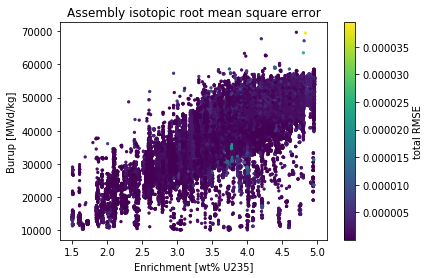

In [19]:
plt.scatter(for_plot['init_enr'], for_plot['bu'], c=for_plot['rmse'], s=5)
cbar = plt.colorbar()
cbar.set_label('total RMSE')
plt.xlabel('Enrichment [wt% U235]')
plt.ylabel('Burup [MWd/kg]')
plt.title('Assembly isotopic root mean square error')
plt.savefig('./images/assem_act.png', format='png')
plt.show()

[38935, 38934, 38931, 38932, 38936, 38929, 38928, 38938, 38954, 38950, 38944, 38953, 38940, 38952, 38948, 38955, 38956, 38957, 38939, 38930, 38933, 38959, 38958, 38937, 37662, 38949, 37661, 37778, 37772, 37761, 37755, 37759, 37765, 38946, 38947, 38941, 38943, 38942, 37760, 37748, 38951, 38945, 1129, 1123, 37774, 37764, 37773, 37777, 37745, 37746, 37766, 37763, 34653, 34481, 34532, 37775, 37776, 37752, 37758, 34533, 34531, 55724, 51148, 45914, 55700, 14487, 14471, 14481, 14477, 14483, 37603, 37597, 14467, 37601, 52946, 14495, 14459, 14463, 45915, 37599, 30310, 17298, 17304, 17313, 14485, 17305, 17307, 14455, 37596, 17312, 14453, 14457, 17306, 17297, 37604, 34828, 17309, 34480, 14497, 14461, 22498, 37598, 17300, 48182, 48208, 48207, 17301, 37762, 37770, 37771, 14465, 48241, 37754, 37769, 37768, 48183, 59232, 21221, 21215, 48185, 21224, 21214, 21226, 21213, 21212, 21227, 37595, 21220, 21219, 21218, 21223, 21222, 21216, 21217, 37781, 37779, 48210, 37780, 37785, 37782, 37783, 37784, 65231, 

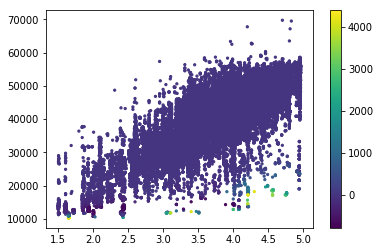

In [63]:
kill_indx = sorted(range(len(for_plot['rmpe'])), key=lambda i: for_plot['rmpe'][i])[:200]
kill_indx += sorted(range(len(for_plot['rmpe'])), key=lambda i: for_plot['rmpe'][i])[-200:]
new_list = [i for indx, i in enumerate(for_plot['rmpe']) if indx not in kill_indx]
x = [i for indx, i in enumerate(for_plot['init_enr']) if indx not in kill_indx]
y = [i for indx, i in enumerate(for_plot['bu']) if indx not in kill_indx]
print(kill_indx)
plt.scatter(x, y, c=new_list, s=5)
plt.colorbar()
plt.show()

## Error for all isotopes for single enrichment / burnup

In [21]:
import random
rand_indx = random.sample(range(1, len(lump_dict.keys())), 10)
print(rand_indx)


enr_bu_dict = {}
for i in rand_indx:
    enr_bu_dict[i] = {}
    enr_bu_dict[i]['enr'] = lump_dict[i]['init_enr']
    enr_bu_dict[i]['bu'] = lump_dict[i]['bu']
    
    enr_bu_dict[i]['err'] = {}
    for iso in iso_list:
        if iso == 'other':
            continue
        err = (lump_dict[i]['comp'][iso] - rom_dict[i]['comp'][iso]) / lump_dict[i]['comp'][iso] * 100
        enr_bu_dict[i]['err'][iso] = err


[9634, 37121, 58066, 27526, 39687, 38091, 37348, 40723, 64445, 55036]


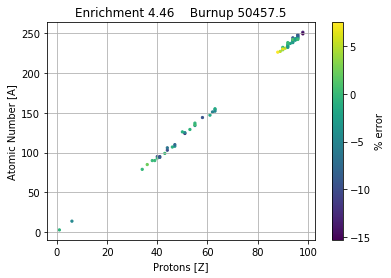

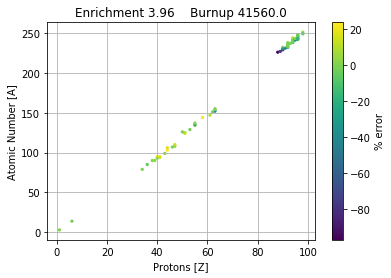

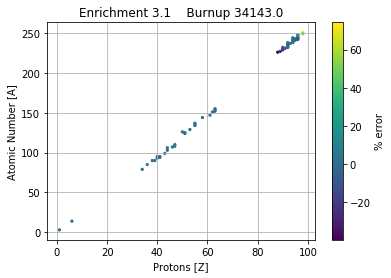

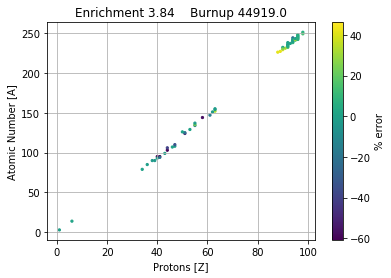

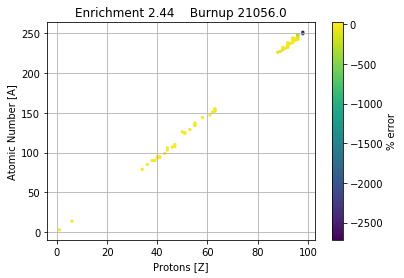

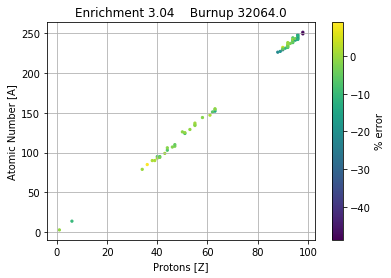

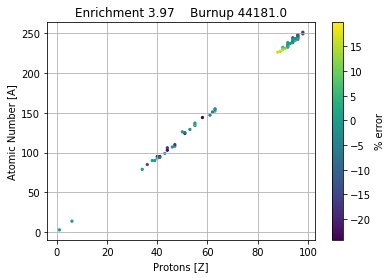

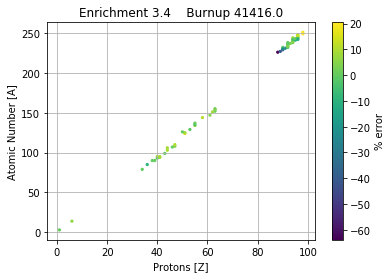

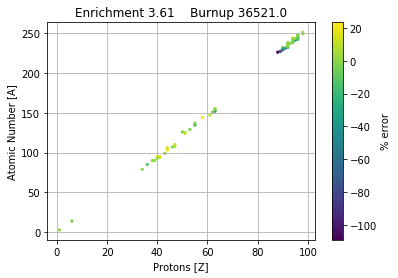

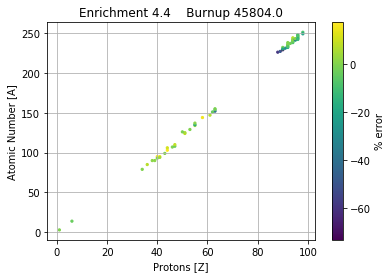

In [22]:
for date, val in enr_bu_dict.items():
    z = []
    a = []
    for iso in val['err']:
        z.append(nucname.zzzaaa(iso) // 1000)
        a.append(nucname.zzzaaa(iso) % 1000)
    plt.scatter(z, a, c=list(val['err'].values()), s=5)
    enr = round(float(val['enr']), 2) 
    bu = round(float(val['bu']), 2)
    plt.title('Enrichment ' + str(enr) + '    ' + 'Burnup ' + str(bu))
    plt.xlabel('Protons [Z]')
    plt.ylabel('Atomic Number [A]')
    cbar = plt.colorbar()
    cbar.set_label('% error')    
    plt.grid()
    plt.savefig('./images/err/' + str(enr).replace('.', '-') + '_' + str(bu).replace('.', '-') + '.png', format='png')
    plt.show()
    plt.close()

# Then we convert the assembly to `pyne` material, for decay and analysis

In [23]:
def attach_pyne_material(assem_dict):
    for key, value in assem_dict.items():
        pyne_mat = Material(value['comp'], value['mass'])
        assem_dict[key]['mat'] = pyne_mat
    return assem_dict

In [24]:
lump_dict = attach_pyne_material(lump_dict)
recipe_dict = attach_pyne_material(recipe_dict)
rom_dict = attach_pyne_material(rom_dict)

### Data vs Model decay and activity

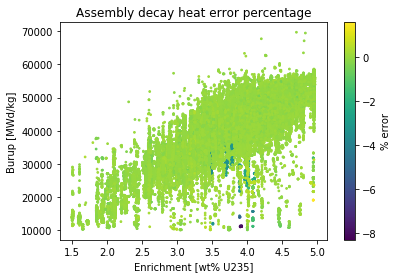

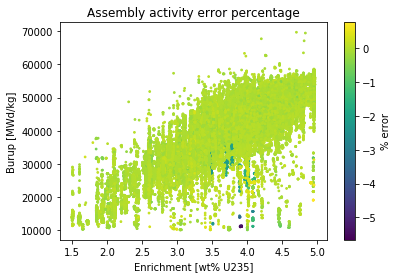

In [65]:
bu_list = []
enr_list = []
decay_heat_err_list = []
activity_err_list = []

# compare decay heat / activity error for each assemblys 

def get_err(one, two):
    tot = 0
    for key,val in one.items():
        try:
            if np.isnan(val) or np.isnan(two[key]):
               continue
            tot += (val - two[key])
        except:
            continue
    return tot / np.nansum(list(one.values()))

for key, val in lump_dict.items():
    bu_list.append(val['bu'])
    enr_list.append(val['init_enr'])
    model_mat = rom_dict[key]['mat']
    lump_mat = val['mat']
    decay_heat_err = get_err(lump_mat.decay_heat(), model_mat.decay_heat())
    decay_heat_err_list.append(decay_heat_err)
    activity_err = get_err(lump_mat.activity(), model_mat.activity())
    activity_err_list.append(activity_err)

    

plt.scatter(enr_list, bu_list, c=decay_heat_err_list, s=3)
cbar = plt.colorbar()
cbar.set_label('% error')
plt.xlabel('Enrichment [wt% U235]')
plt.ylabel('Burup [MWd/kg]')
plt.title('Assembly decay heat error percentage')
plt.savefig('./images/assem_dh.png', format='png')
plt.show()
plt.close()


plt.scatter(enr_list, bu_list, c=activity_err_list, s=3)
cbar = plt.colorbar()
cbar.set_label('% error')
plt.xlabel('Enrichment [wt% U235]')
plt.ylabel('Burup [MWd/kg]')
plt.title('Assembly activity error percentage')
plt.savefig('./images/assem_act.png', format='png')
plt.show()
plt.close()


### Data vs Average decay and activity

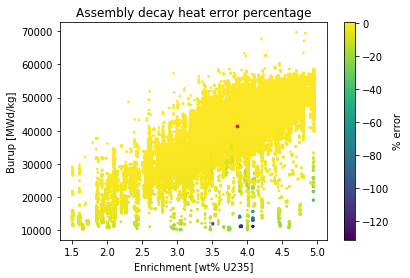

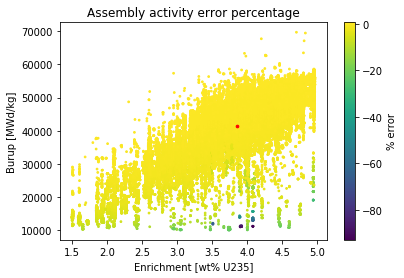

In [64]:
# error for all assembly metric for average recipe
bu_list = []
enr_list = []
decay_heat_err_list = []
activity_err_list = []

# compare decay heat / activity error for each assemblys 


for key, val in lump_dict.items():
    bu_list.append(val['bu'])
    enr_list.append(val['init_enr'])
    recipe_mat = recipe_dict[key]['mat']
    lump_mat = val['mat']
    decay_heat_err = get_err(lump_mat.decay_heat(), recipe_mat.decay_heat())
    decay_heat_err_list.append(decay_heat_err)
    activity_err = get_err(lump_mat.activity(), recipe_mat.activity())
    activity_err_list.append(activity_err)

plt.scatter(enr_list, bu_list, c=decay_heat_err_list, s=3)
cbar = plt.colorbar()
cbar.set_label('% error')    
plt.scatter(average_assem['init_enr'], average_assem['bu'], color='red', s=7)
plt.xlabel('Enrichment [wt% U235]')
plt.ylabel('Burup [MWd/kg]')
plt.title('Assembly decay heat error percentage')
plt.savefig('./images/assem_dh_recipe.png', format='png')
plt.show()
plt.close()

plt.scatter(enr_list, bu_list, c=activity_err_list, s=3)
cbar = plt.colorbar()
cbar.set_label('% error')
plt.scatter(average_assem['init_enr'], average_assem['bu'], color='red', s=7)

plt.xlabel('Enrichment [wt% U235]')
plt.ylabel('Burup [MWd/kg]')
plt.title('Assembly activity error percentage')
plt.savefig('./images/assem_act_recipe.png', format='png')
plt.show()
plt.close()


# Then we decay the assemblies to 2020:

In [27]:
def find_diff_time_secs(year, month, day, evaluation_date):
    # the UNF-ST&DARDS data format is YYYY-MM-DD
    ev_year = int(evaluation_date[:4])
    ev_month = int(evaluation_date[5:7])
    ev_day = int(evaluation_date[8:])
    
    dyear = 0
    dmonth = 0
    dday = day - ev_day
    if dday < 0:
        dmonth -= 1
        dday += 30
    dmonth += month - ev_month
    if dmonth < 0:
        dyear -= 1
        dmonth += 12
    dyear += year - ev_year
    if dyear < 0:
        raise ValueError('Cannot go back in time man')
    
    time_in_sec = dyear * (365 * 24 * 3600) + dmonth * (30 * 24 * 3600) + dday * (24 * 3600)
    return time_in_sec

In [28]:
def decay_assemblies(assem_dict, year=2020):
    # just put the pyne materials in there, other categories are unnecessary
    decayed_dict = {}
    for key, value in assem_dict.items():
        # to 2020-07-01
        eval_date = lump_dict[key]['evaluation_date']
        decay_time = find_diff_time_secs(year, 7, 1, eval_date)
        decayed_dict[key] = {}
        decayed_dict[key]['mass'] = assem_dict[key]['mass']
        decayed_dict[key]['mat'] = assem_dict[key]['mat'].decay(decay_time)
    return decayed_dict

In [29]:
decayed_lump_dict_3000 = decay_assemblies(lump_dict, 3000)
decayed_recipe_dict_3000 = decay_assemblies(recipe_dict, 3000)
decayed_rom_dict_3000 = decay_assemblies(rom_dict, 3000)

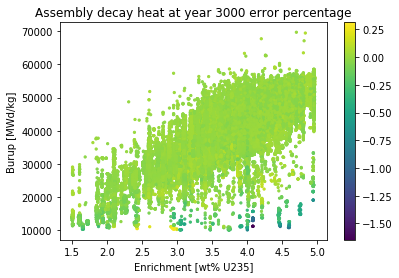

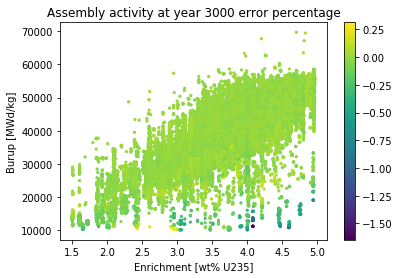

In [30]:
bu_list = []
enr_list = []
decay_heat_err_list = []
activity_err_list = []

# compare decay heat / activity error for each assemblys at year 3000

for key, val in decayed_lump_dict_3000.items():
    bu_list.append(lump_dict[key]['bu'])
    enr_list.append(lump_dict[key]['init_enr'])
    model_mat = decayed_rom_dict_3000[key]['mat']
    lump_mat = val['mat']
    decay_heat_err = get_err(lump_mat.decay_heat(), model_mat.decay_heat())
    decay_heat_err_list.append(decay_heat_err)
    activity_err = get_err(lump_mat.activity(), model_mat.activity())
    activity_err_list.append(activity_err)

    

plt.scatter(enr_list, bu_list, c=decay_heat_err_list, s=5)
plt.colorbar()
plt.xlabel('Enrichment [wt% U235]')
plt.ylabel('Burup [MWd/kg]')
plt.title('Assembly decay heat at year 3000 error percentage')
plt.show()
plt.close()


plt.scatter(enr_list, bu_list, c=activity_err_list, s=5)
plt.colorbar()
plt.xlabel('Enrichment [wt% U235]')
plt.ylabel('Burup [MWd/kg]')
plt.title('Assembly activity at year 3000 error percentage')
plt.show()
plt.close()

In [31]:
decayed_lump_dict = decay_assemblies(lump_dict)
decayed_recipe_dict = decay_assemblies(recipe_dict)
decayed_rom_dict = decay_assemblies(rom_dict)

# Then we compare the metrics:

In [32]:
import math

def nansum(dictionary):
    summ = 0 
    for key, value in dictionary.items():
        # skip metastable isotopes
        if str(key)[-1] == '1':
            continue
        if not math.isnan(value):
             summ += value
    return summ

def decay_heatz(assem_dict, time=0):
    total_heat = 0
    for key, value in assem_dict.items():
        after = assem_dict[key]['mat'].decay(time)
        total_heat += nansum(after.decay_heat())
    return total_heat

def total_massz(assem_dict, time=0):
    total_mass = 0
    for key, value in assem_dict.items():
        after = assem_dict[key]['mat'].decay(time)
        total_mass += value['mass']
    return total_mass

def activityz(assem_dict, time=0):
    activity = 0
    for key, value in assem_dict.items():
        after = assem_dict[key]['mat'].decay(time)
        activity += nansum(after.activity())
    return activity

def isotopics(assem_dict, time=0):
    iso_dict = {}
    for key, value in assem_dict.items():
        for key2, value2 in value['mat'].mult_by_mass().items():
            if key2 not in iso_dict.keys():
                iso_dict[key2] = value2
            else:
                iso_dict[key2] += value2
    return iso_dict


In [33]:
post_lump = isotopics(decayed_lump_dict)
post_recipe = isotopics(decayed_recipe_dict)
post_rom = isotopics(decayed_rom_dict)

pre_lump = isotopics(lump_dict)
pre_recipe = isotopics(recipe_dict)
pre_rom = isotopics(rom_dict)

In [34]:
top_iso_list = sorted(pre_lump, key=pre_lump.get, reverse=True)
for i in top_iso_list[:10]:
    print(nucname.name(i))

U238
H1
U235
Pu239
U236
Pu240
Pu241
Cs137
Zr93
Tc99


In [35]:
# check pu-239 amount
# total mass -> should be the same
print('UNIT: T')

print('\nPost-decay')
print(post_lump[942390000] * 1e-3) 
print(post_recipe[942390000] * 1e-3)
print(post_rom[942390000] * 1e-3)

print('\nPre-decay')
print(pre_lump[942390000] * 1e-3)
print(pre_recipe[942390000] * 1e-3)
print(pre_rom[942390000] * 1e-3)



UNIT: T

Post-decay
320.197523981637
351.5049565304837
318.41402933757144

Pre-decay
320.3721696504798
351.7015357680648
318.58731379781113


In [36]:
# check cs137 amount
print('CS 137')
print('UNIT: T')

print('\nPost-decay')
print(post_lump[551370000] * 1e-3) 
print(post_recipe[551370000] * 1e-3)
print(post_rom[551370000] * 1e-3)

print('\nPre-decay')
print(pre_lump[551370000] * 1e-3)
print(pre_recipe[551370000] * 1e-3)
print(pre_rom[551370000] * 1e-3)


CS 137
UNIT: T

Post-decay
40.68160757323468
40.914807982065504
40.72509978741368

Pre-decay
63.84527417486042
66.6495065822479
63.92191488631085


In [37]:
# check u235 amount
print('U235')
print('UNIT: T')

print('\nPost-decay')
print(post_lump[922350000] * 1e-3) 
print(post_recipe[922350000] * 1e-3)
print(post_rom[922350000] * 1e-3)

print('\nPre-decay')
print(pre_lump[922350000] * 1e-3)
print(pre_recipe[922350000] * 1e-3)
print(pre_rom[922350000] * 1e-3)

U235
UNIT: T

Post-decay
474.7989033609096
488.16350097131374
471.8808991581094

Pre-decay
474.6024786523531
487.94138676253
471.68577103785503


In [38]:
# check u238 amount
print('U238')
print('UNIT: T')

print('\nPost-decay')
print(post_lump[922380000] * 1e-3) 
print(post_recipe[922380000] * 1e-3)
print(post_rom[922380000] * 1e-3)

print('\nPre-decay')
print(pre_lump[922380000] * 1e-3)
print(pre_recipe[922380000] * 1e-3)
print(pre_rom[922380000] * 1e-3)

U238
UNIT: T

Post-decay
42171.064853949116
42016.97484541517
42174.37940945057

Pre-decay
42171.06393027953
42016.97377902635
42174.378483243454


In [39]:
# check tc99 amount
print('Tc99')
print('UNIT: T')

print('\nPost-decay')
print(post_lump[430990000] * 1e-3) 
print(post_recipe[430990000] * 1e-3)
print(post_rom[430990000] * 1e-3)

print('\nPre-decay')
print(pre_lump[430990000] * 1e-3)
print(pre_recipe[430990000] * 1e-3)
print(pre_rom[430990000] * 1e-3)

Tc99
UNIT: T

Post-decay
41.636075707535
43.19218462338955
41.62796665058193

Pre-decay
41.63891178318326
43.19535442663347
41.63080192999923


In [40]:
# total mass -> should be the same
print('UNIT: T')

print('\nPost-decay')
print(total_massz(decayed_lump_dict) * 1e-3) 
print(total_massz(decayed_recipe_dict) * 1e-3)
print(total_massz(decayed_rom_dict) * 1e-3)

print('\nPre-decay')
print(total_massz(lump_dict) * 1e-3)
print(total_massz(recipe_dict) * 1e-3)
print(total_massz(rom_dict) * 1e-3)


UNIT: T

Post-decay
45341.2687358307
45341.2687358307
45341.2687358307

Pre-decay
45341.2687358307
45341.2687358307
45341.2687358307


In [41]:
print('UNIT: MW')
print('\nPost-decay')
print(decay_heatz(decayed_lump_dict) * 1e3) 
print(decay_heatz(decayed_recipe_dict) * 1e3)
print(decay_heatz(decayed_rom_dict) * 1e3)

print('\nPre-decay')
print(decay_heatz(lump_dict)* 1e3)
print(decay_heatz(recipe_dict)* 1e3)
print(decay_heatz(rom_dict) * 1e3)


UNIT: MW

Post-decay
40.97891076940025
41.46506775715293
40.9667502905555

Pre-decay
193.3994426176987
198.55461907672318
192.45054391720862


In [42]:
print('UNIT: Bq')
print('\nPost-decay')
print(activityz(decayed_lump_dict) * 1e3)
print(activityz(decayed_recipe_dict)* 1e3)
print(activityz(decayed_rom_dict) * 1e3)

print('\nPre-decay')
print(activityz(lump_dict) * 1e3)
print(activityz(recipe_dict) * 1e3)
print(activityz(rom_dict) * 1e3)

UNIT: Bq

Post-decay
4.6752213750651886e+20
4.7161305974482384e+20
4.6694123420529983e+20

Pre-decay
2.799959758690034e+21
2.8441292396183694e+21
2.777068959964793e+21


# Checking that our results match the data, we do a direct comparison between the decayed material using UNF-ST&DARDS and an Avg. Recipe

In [43]:
# lump the materials to one material to make this easier
def lump_dict_to_mat(assem_dict):
    out_mat = Material({'H1':1},1e-6)
    for key, val in assem_dict.items():
        out_mat = out_mat + assem_dict[key]['mat']
    return out_mat

In [44]:
decayed_lump_mat = lump_dict_to_mat(decayed_lump_dict)
decayed_recipe_mat = lump_dict_to_mat(decayed_recipe_dict)
decayed_rom_mat = lump_dict_to_mat(decayed_rom_dict)

In [45]:
def plot_decay_heat(mat, start_year, end_year, n_grid=100):
    heat_array = np.zeros(n_grid)
    time_array = np.linspace(0, ((end_year - start_year) * (3600 * 24 * 365)), n_grid)
    time_axis = np.linspace(start_year, end_year, n_grid)
    for index, time in enumerate(time_array):
        decayed = mat.decay(time)
        heat_array[index] = nansum(decayed.decay_heat())
    return time_axis, heat_array * 1e3

def plot_activity(mat, start_year, end_year, n_grid=100):
    heat_array = np.zeros(n_grid)
    time_array = np.linspace(0, ((end_year - start_year) * (3600 * 24 * 365)), n_grid)
    time_axis = np.linspace(start_year, end_year, n_grid)
    for index, time in enumerate(time_array):
        decayed = mat.decay(time)
        heat_array[index] = nansum(decayed.activity())
    return time_axis, heat_array * 1e3

def get_fissile_eq(mat, thermal=False):
    # from plutonium fuel - an assessment (NEA)
    eq = 0
    if thermal:
        eq += mat.mult_by_mass()[922350000] * 0.8
        eq += mat.mult_by_mass()[942380000] * (-1.0)
        eq += mat.mult_by_mass()[942390000] * (1.0)
        eq += mat.mult_by_mass()[942400000] * (-0.4)
        eq += mat.mult_by_mass()[942410000] * (1.3)
        eq += mat.mult_by_mass()[942420000] * (-1.4)
        eq += mat.mult_by_mass()[952410000] * (-2.2)
    else:
        # fast spectrum (super-phenix)
        eq += mat.mult_by_mass()[922350000] * 0.8
        eq += mat.mult_by_mass()[942380000] * (0.44)
        eq += mat.mult_by_mass()[942390000] * (1.0)
        eq += mat.mult_by_mass()[942400000] * (0.14)
        eq += mat.mult_by_mass()[942410000] * (1.5)
        eq += mat.mult_by_mass()[942420000] * (0.037)
        eq += mat.mult_by_mass()[952410000] * (-0.33)
    return eq * 1e-3

def plot_fissile_quality(mat, start_year, end_year, n_grid=100):
    qual_array = np.zeros(n_grid)
    time_array = np.linspace(0, ((end_year - start_year) * (3600 * 24 * 365)), n_grid)
    time_axis = np.linspace(start_year, end_year, n_grid)
    for index, time in enumerate(time_array):
        decayed = mat.decay(time)
        qual_array[index] = get_fissile_eq(decayed)
    return time_axis, qual_array

In [46]:
# decay heat at discrete times

# to 2100
print('At 2100:')
t_to_2100 = 80 * (3600 * 24 * 365)
acc = nansum(decayed_lump_mat.decay(t_to_2100).decay_heat())
rec = nansum(decayed_rom_mat.decay(t_to_2100).decay_heat())
print(acc)
print(rec)
print('err %')
print((acc-rec)/acc * 100)
print('\n')

print('At 3100')
t_to_3100 = 1080 * (3600 * 24 * 365)
acc = nansum(decayed_lump_mat.decay(t_to_3100).decay_heat())
rec = nansum(decayed_rom_mat.decay(t_to_3100).decay_heat())
print(acc)
print(rec)
print('err %')
print((acc-rec)/acc * 100)
print('\n')


At 2100:
0.016420820313491048
0.016382249255142256
err %
0.2348911784699509


At 3100
0.003136121093067559
0.0031244759561914995
err %
0.37132293462140453




In [47]:
# activity at discrete times
from decimal import Decimal

# to 2100

t_to_2100 = 80 * (3600 * 24 * 365)
acc = nansum(decayed_lump_mat.decay(t_to_2100).activity())
rec = nansum(decayed_rom_mat.decay(t_to_2100).activity())
print(acc)
print(rec)
print('err %')
print((acc-rec)/acc * 100)
print('\n')


t_to_3100 = 1080 * (3600 * 24 * 365)
acc = nansum(decayed_lump_mat.decay(t_to_3100).activity())
rec = nansum(decayed_rom_mat.decay(t_to_3100).activity())
print('%.2E' % Decimal(acc))
print('%.2E' % Decimal(rec))
print('err %')
print((acc-rec)/acc * 100)
print('\n')


6.392175534844179e+16
6.3910130569058616e+16
err %
0.018185951433605893


3.68E+15
3.66E+15
err %
0.3545484191962124




In [48]:
time_acc, heat_acc = plot_decay_heat(decayed_lump_mat, 2020, 3100)
time_rom, heat_rom = plot_decay_heat(decayed_rom_mat, 2020, 3100)
time_rec, heat_rec = plot_decay_heat(decayed_recipe_mat, 2020, 3100)

time_acc, act_acc = plot_activity(decayed_lump_mat, 2020, 3100)
time_rom, act_rom = plot_activity(decayed_rom_mat, 2020, 3100)
time_rec, act_rec = plot_activity(decayed_recipe_mat, 2020, 3100)

time_acc, fiss_acc = plot_fissile_quality(decayed_lump_mat, 2020, 3100)
time_rom, fiss_rom = plot_fissile_quality(decayed_rom_mat, 2020, 3100)
time_rec, fiss_rec = plot_fissile_quality(decayed_recipe_mat, 2020, 3100)

In [49]:
err_heat = (heat_acc - heat_rec) / heat_acc * 100
err_act = (act_acc - act_rec) / act_acc * 100
err_heat_rom = (heat_acc - heat_rom) / heat_acc * 100
err_act_rom = (act_acc - act_rom) / act_acc * 100

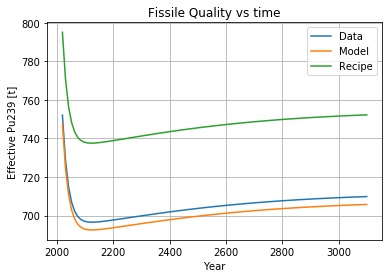

<function matplotlib.pyplot.close(fig=None)>

In [50]:
plt.plot(time_acc, fiss_acc, label='Data')
plt.plot(time_rec, fiss_rom, label='Model')
plt.plot(time_rec, fiss_rec, label='Recipe')

plt.title('Fissile Quality vs time')
plt.xlabel('Year')
plt.ylabel('Effective Pu239 [t]')
plt.legend()
plt.grid()
plt.savefig('./images/fiss.png', format='png')
plt.show()
plt.close

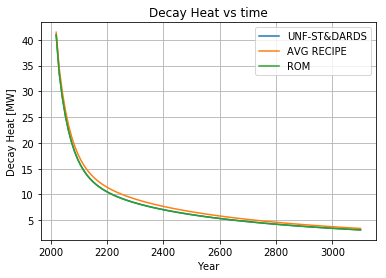

<function matplotlib.pyplot.close(fig=None)>

In [51]:
plt.plot(time_acc, heat_acc, label='UNF-ST&DARDS')
plt.plot(time_rec, heat_rec, label='AVG RECIPE')
plt.plot(time_rec, heat_rom, label='ROM')

plt.title('Decay Heat vs time')
plt.xlabel('Year')
plt.ylabel('Decay Heat [MW]')
plt.legend()
plt.grid()
plt.savefig('./images/heat.png', format='png')
plt.show()
plt.close

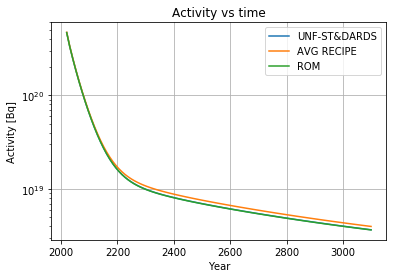

<function matplotlib.pyplot.close(fig=None)>

In [52]:
plt.semilogy(time_acc, act_acc, label='UNF-ST&DARDS')
plt.semilogy(time_rec, act_rec, label='AVG RECIPE')
plt.semilogy(time_rom, act_rom, label='ROM')
plt.title('Activity vs time')
plt.xlabel('Year')
plt.ylabel('Activity [Bq]')
plt.legend()
plt.grid()
plt.savefig('./images/activity.png', format='png')
plt.show()
plt.close

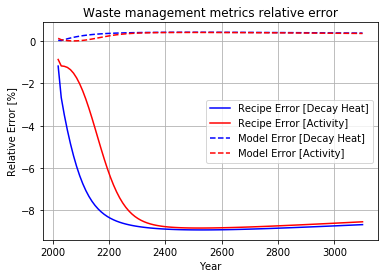

In [53]:
plt.plot(time_acc, err_heat, label='Recipe Error [Decay Heat]', color='b')
plt.plot(time_acc, err_act, label='Recipe Error [Activity]', color='r')

plt.plot(time_acc, err_heat_rom, label='Model Error [Decay Heat]', color='b', linestyle='--')
plt.plot(time_acc, err_act_rom, label='Model Error [Activity]', color='r', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Relative Error [%]')
plt.legend()
plt.grid()
plt.title('Waste management metrics relative error')
plt.tight_layout
plt.savefig('./images/ha_err.png', format='png')
plt.show()
plt.close()

# Compare isotopic differences

In [54]:
def compare_isotope(acc_mat, rec_mat, isotope_list, rel_err=False):
    # convert to canonical / pyne-standard form
    isotope_list = [nucname.id(x) for x in isotope_list]
    iso_diff_dict = {}
    for iso in isotope_list:
        acc_qty = acc_mat.mult_by_mass()[iso]
        rec_qty = rec_mat.mult_by_mass()[iso]
        if rel_err:
            iso_diff_dict[nucname.name(iso)] = (acc_qty - rec_qty) / acc_qty * 100
        else:
            iso_diff_dict[nucname.name(iso)] = (acc_qty - rec_qty) * 1e-3
    return iso_diff_dict

def compare_element(acc_mat, rec_mat, zz_list, rel_err=False):
    el_diff_dict = {}
    for zz in zz_list:
        acc_qty = 0
        rec_qty = 0
        for key, val in acc_mat.mult_by_mass().items():
            if key // 10000000 == zz:
                acc_qty += acc_mat.mult_by_mass()[key]
                rec_qty += rec_mat.mult_by_mass()[key]
        if rel_err:
            el_diff_dict[zz] = (acc_qty - rec_qty) / acc_qty * 100
        else:
            el_diff_dict[zz] = acc_qty - rec_qty
    return el_diff_dict

def get_fissile_eq(mat, thermal=False):
    # from plutonium fuel - an assessment (NEA)
    eq = 0
    if thermal:
        eq += mat.mult_by_mass()[922350000] * 0.8
        eq += mat.mult_by_mass()[942380000] * (-1.0)
        eq += mat.mult_by_mass()[942390000] * (1.0)
        eq += mat.mult_by_mass()[942400000] * (-0.4)
        eq += mat.mult_by_mass()[942410000] * (1.3)
        eq += mat.mult_by_mass()[942420000] * (-1.4)
        eq += mat.mult_by_mass()[952410000] * (-2.2)
    else:
        # fast spectrum (super-phenix)
        eq += mat.mult_by_mass()[922350000] * 0.8
        eq += mat.mult_by_mass()[942380000] * (0.44)
        eq += mat.mult_by_mass()[942390000] * (1.0)
        eq += mat.mult_by_mass()[942400000] * (0.14)
        eq += mat.mult_by_mass()[942410000] * (1.5)
        eq += mat.mult_by_mass()[942420000] * (0.037)
        eq += mat.mult_by_mass()[952410000] * (-0.33)
    return eq

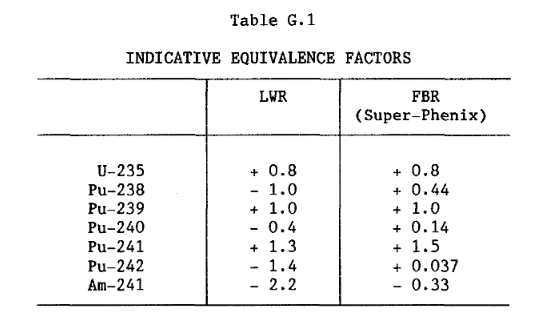

In [55]:
# Pu equiv factor from plutonium fuels (NEA)
from IPython.display import Image
Image('./images/pu_equiv.png')

In [56]:
Image('./images/pu_equiv_eq.png')

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

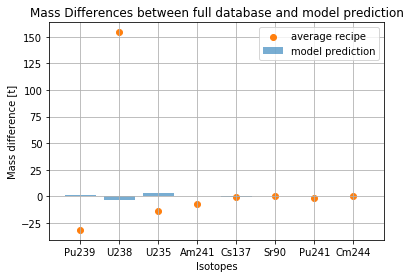

In [57]:
iso_list = ['Pu239', 'U238', 'U235', 'Am241', 'Cs137', 'Sr90', 'Pu241', 'Cm244']
iso_diff_dict = compare_isotope(decayed_lump_mat, decayed_rom_mat, iso_list)
iso_diff_dict_recipe = compare_isotope(decayed_lump_mat, decayed_recipe_mat, iso_list)
plt.bar(iso_diff_dict.keys(), iso_diff_dict.values(), alpha=0.6, label='model prediction')
plt.scatter(iso_diff_dict_recipe.keys(), iso_diff_dict_recipe.values(), label='average recipe')

plt.grid()
plt.ylabel('Mass difference [t]')
plt.xlabel('Isotopes')
plt.legend()
plt.title('Mass Differences between full database and model prediction')
plt.savefig('./images/iso_mass.png', format='png')
plt.show()
plt.close()

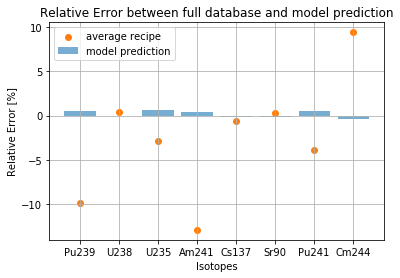

In [58]:
iso_list = ['Pu239', 'U238', 'U235', 'Am241', 'Cs137', 'Sr90', 'Pu241', 'Cm244']
iso_diff_dict = compare_isotope(decayed_lump_mat, decayed_rom_mat, iso_list, rel_err=True)
iso_diff_dict_recipe = compare_isotope(decayed_lump_mat, decayed_recipe_mat, iso_list, rel_err=True)

plt.bar(iso_diff_dict.keys(), iso_diff_dict.values(), alpha=0.6, label='model prediction')
plt.scatter(iso_diff_dict_recipe.keys(), iso_diff_dict_recipe.values(), label='average recipe')
plt.grid()
plt.ylabel('Relative Error [%]')
plt.xlabel('Isotopes')
plt.legend()
plt.title('Relative Error between full database and model prediction')
plt.savefig('./images/iso_rel.png', format='png')
plt.show()
plt.close()

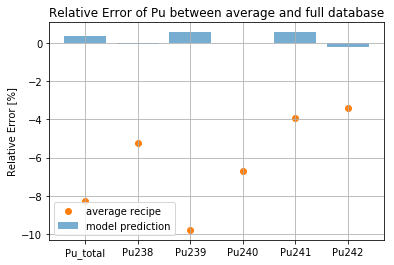

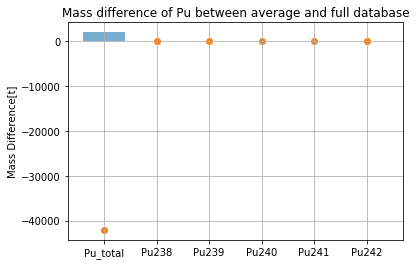

In [59]:
zz_list = [94]
el_diff_dict = compare_element(decayed_lump_mat, decayed_rom_mat, zz_list, rel_err=True)
el_diff_dict_recipe = compare_element(decayed_lump_mat, decayed_recipe_mat,
                                      zz_list, rel_err=True)

#plt.bar(['Pu Total'], [el_diff_dict[94]], alpha=0.6, label='model prediction')
#plt.scatter(['Pu Total'], [el_diff_dict_recipe[94]], label='average recipe')

iso_list = ['Pu238', 'Pu239', 'Pu240', 'Pu241', 'Pu242']

iso_diff_dict = compare_isotope(decayed_lump_mat, decayed_rom_mat, iso_list, rel_err=True)
iso_diff_dict_recipe = compare_isotope(decayed_lump_mat, decayed_recipe_mat,
                                       iso_list, rel_err=True)

plt.bar(['Pu_total'] + iso_list, [el_diff_dict[94]] + list(iso_diff_dict.values()), alpha=0.6, label='model prediction')
plt.scatter(['Pu_total'] + iso_list, [el_diff_dict_recipe[94]] + list(iso_diff_dict_recipe.values()), label='average recipe')
plt.grid()
plt.legend()
plt.ylabel('Relative Error [%]')
plt.title('Relative Error of Pu between average and full database')
plt.savefig('./images/pu_rel.png', format='png')
plt.show()
plt.close()

# actual mass difference
zz_list = [94]
el_diff_dict = compare_element(decayed_lump_mat, decayed_rom_mat, zz_list, rel_err=False)
el_diff_dict_recipe = compare_element(decayed_lump_mat, decayed_recipe_mat,
                                      zz_list, rel_err=False)
iso_list = ['Pu238', 'Pu239', 'Pu240', 'Pu241', 'Pu242']

iso_diff_dict = compare_isotope(decayed_lump_mat, decayed_rom_mat, iso_list, rel_err=False)
iso_diff_dict_recipe = compare_isotope(decayed_lump_mat, decayed_recipe_mat,
                                       iso_list, rel_err=False)

plt.bar(['Pu_total'] + iso_list, [el_diff_dict[94]] + list(iso_diff_dict.values()), alpha=0.6, label='model prediction')
plt.scatter(['Pu_total'] + iso_list, [el_diff_dict_recipe[94]] + list(iso_diff_dict_recipe.values()), label='average recipe')
plt.bar(iso_diff_dict.keys(), np.array(list(iso_diff_dict.values())))
plt.grid()
plt.ylabel('Mass Difference[t]')
plt.title('Mass difference of Pu between average and full database')
plt.savefig('./images/pu_mass.png', format='png')
plt.show()
plt.close()

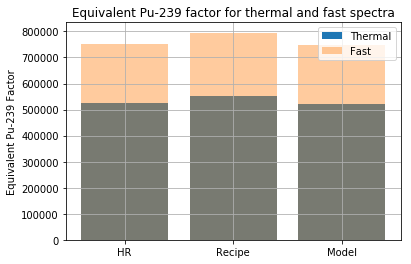

0.5268483342416956
0.5505431237703421
0.7520490758240634
0.7950642230574754


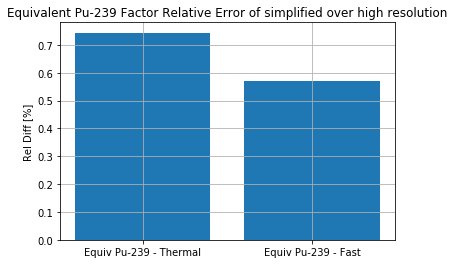

0.7437527152603962
0.5716058036029572


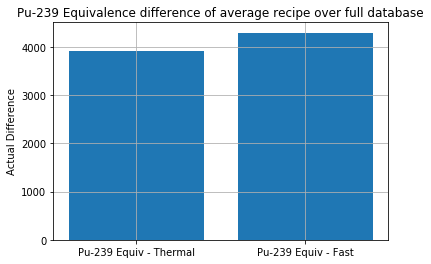

In [60]:
# eff pu241 for thermal and fast


acc_eq_thermal = get_fissile_eq(decayed_lump_mat, True)
acc_eq_fast = get_fissile_eq(decayed_lump_mat, False)
model_eq_thermal = get_fissile_eq(decayed_rom_mat, True)
model_eq_fast = get_fissile_eq(decayed_rom_mat, False)
rec_eq_thermal = get_fissile_eq(decayed_recipe_mat, True)
rec_eq_fast = get_fissile_eq(decayed_recipe_mat, False)

rel_err_thermal = (acc_eq_thermal - model_eq_thermal) / acc_eq_thermal * 100
rel_err_fast = (acc_eq_fast - model_eq_fast) / acc_eq_fast * 100


plt.bar(['HR', 'Recipe', 'Model'],
        [acc_eq_thermal, rec_eq_thermal, model_eq_thermal],
        label='Thermal')
plt.bar(['HR', 'Recipe', 'Model'],
        [acc_eq_fast, rec_eq_fast, model_eq_fast],
        label='Fast', alpha=0.4)
plt.grid()
plt.ylabel('Equivalent Pu-239 Factor')
plt.legend()
plt.title('Equivalent Pu-239 factor for thermal and fast spectra')
plt.savefig('./images/equiv_all.png', format='png')
plt.show()
plt.close()

print(acc_eq_thermal *1e-6)
print(rec_eq_thermal*1e-6)
print(acc_eq_fast*1e-6)
print(rec_eq_fast*1e-6)

plt.bar(['Equiv Pu-239 - Thermal', 'Equiv Pu-239 - Fast'], [rel_err_thermal, rel_err_fast])
plt.grid()
plt.ylabel('Rel Diff [%]')
plt.title('Equivalent Pu-239 Factor Relative Error of simplified over high resolution')
plt.savefig('./images/equiv_rel.png', format='png')
plt.show()
plt.close()

print(rel_err_thermal)
print(rel_err_fast)

plt.bar(['Pu-239 Equiv - Thermal', 'Pu-239 Equiv - Fast'], [acc_eq_thermal - model_eq_thermal, acc_eq_fast - model_eq_fast])
plt.grid()
plt.ylabel('Actual Difference')
plt.title('Pu-239 Equivalence difference of average recipe over full database')
plt.show()
plt.close()